Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6534512287675823..7.656843280307866].


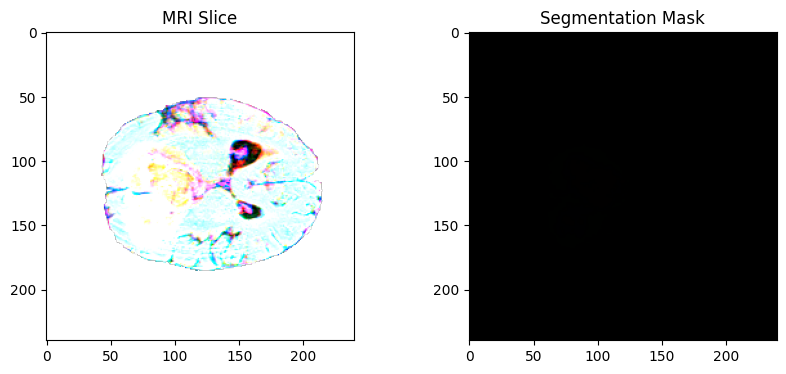

In [1]:
import h5py
import matplotlib.pyplot as plt

# Path to one of your slice files
file_path = './data/BraTS/BraTS2020_training_data/content/data/volume_47_slice_74.h5'

# Open the file
with h5py.File(file_path, 'r') as f:
    image = f['image'][:]
    mask = f['mask'][:]  # If available

# Display
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('MRI Slice')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='Reds')
plt.title('Segmentation Mask')

plt.show()

In [2]:
# Understanding the dataset

import numpy as np

print(f"Image shape: {image.shape}")
print(f"Mask shape: {mask.shape}")
print(f"Image range: {image.min()} to {image.max()}")
print(f"Unique mask values: {np.unique(mask)}")

Image shape: (240, 240, 4)
Mask shape: (240, 240, 3)
Image range: -0.6534512287675823 to 7.656843280307866
Unique mask values: [0 1]


In [3]:
# Loop through a few slices
for i in [1, 50, 75, 100, 120]:
    try:
        with h5py.File(f'./data/BraTS/BraTS2020_training_data/content/data/volume_47_slice_{i}.h5', 'r') as f:
            mask = f['mask'][:]
            tumor_pixels = np.sum(mask > 0)
            print(f"Slice {i}: {tumor_pixels} tumor pixels")
    except:
        print(f"Slice {i}: file not found")

Slice 1: 0 tumor pixels
Slice 50: 62 tumor pixels
Slice 75: 3500 tumor pixels
Slice 100: 2026 tumor pixels
Slice 120: 271 tumor pixels
